# THE CORA DATASET

> The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words.

| Name    | #nodes | #edges | #features | #classes | 
|----------------|--------|--------|-----------|----------|
| Cora          | 2,708 | 10,556 | 1,433     | 7        | 


### Download and unzip, say in ~/data/cora/.

In [16]:
import os
import networkx as nx
import pandas as pd
data_dir = os.path.expanduser("cora_dataset")

### Import the edges via pandas:

In [17]:
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"

### The edgelist is a simple table with the source citing the target. All edges have the same label:

In [20]:
edgelist.sample(frac=1).head(5) # shuffle and show 5 random rows

,target,source,label
213,117,17476,cites
604,2653,1152075,cites
4725,264347,1153183,cites
3042,39890,294030,cites
4831,358884,358894,cites


### Creating a graph from this is easy:

In [5]:
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(Gnx, "paper", "label")

### Node

In [6]:
Gnx.nodes[1103985]

{'label': 'paper'}

### The data attached to the nodes consists of flags indicating whether a word in a 1433-long dictionary is present or not:

In [7]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), sep='\t', header=None, names=column_names)


### Each node has a subject and 1433 other flags corresponding to word occurence:

In [8]:
node_data.head(5)

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


### The different subjects are:

In [9]:
set(node_data["subject"]) # 7 unique classes

{'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}

2708


In [10]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='~/somewhere/Cora', name='Cora')

data = dataset[0]
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Processing...
Done!
/opt/anaconda3/envs/dynamicPython/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/opt/anaconda3/envs/dynamicPython/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


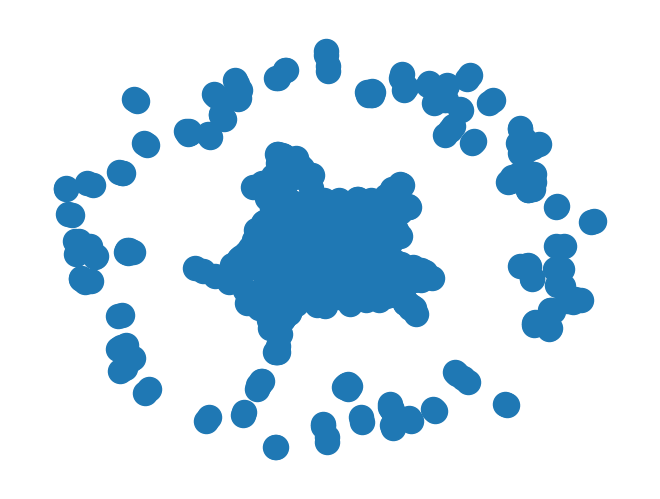

In [11]:
import networkx as nx
from torch_geometric.utils import to_networkx
G = to_networkx(data, to_undirected=True)
nx.draw(G)

In [15]:
from torch_geometric.datasets import Amazon
import numpy as np
from scipy.sparse import coo_matrix
import networkx as nx
# the name can only be 'Computers' or 'Photo' in this case.
amazon = Amazon(root='~/Amazon', name="Computers");
edges = amazon.data["edge_index"];
row = edges[0].numpy();
column = edges[1].numpy();
data = np.repeat(1, edges.shape[1]);
adj = coo_matrix((data, (row, column)));
# graph = nx.from_scipy_sparse_matrix(adj);
graph = nx.to_scipy_sparse_array(adj);
nx.write_gexf(graph, "~/graph.gml")

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]